In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
import pandas as pd
df = pd.read_csv("AirPassengers - AirPassengers.csv", parse_dates=['Month'], index_col='Month')
data = df['#Passengers']

In [8]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [10]:
def calc_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Quest\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -535.037
Date:                Thu, 27 Nov 2025   AIC                           1078.074
Time:                        22:59:35   BIC                           1089.053
Sample:                    01-01-1949   HQIC                          1082.530
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.3962     57.377      4.469      0.000     143.939     368.854
ar.L1          0.9469      0.040     23.488      0.000       0.868       1.026
ma.L1          0.4798      0.088 

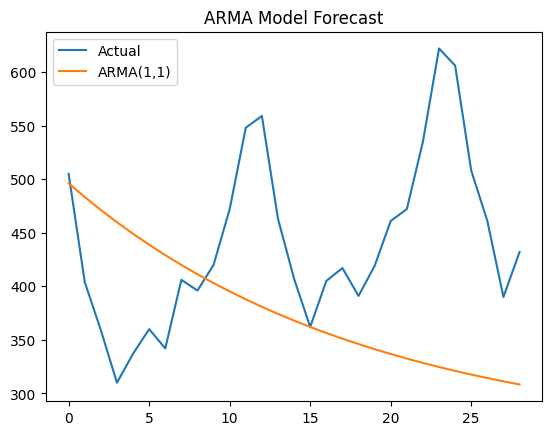

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# i. Initialize ARMA model
arma_model = ARIMA(train, order=(1, 0, 1))

# ii. Train the model
arma_fit = arma_model.fit()
print(f"ARMA(1,1) Summary:\n{arma_fit.summary()}")

# iii. Generate forecasts
arma_pred = arma_fit.forecast(steps=len(test))
print("ARMA Metrics:", calc_metrics(test, arma_pred))

plt.plot(test.values, label='Actual')
plt.plot(arma_pred.values, label='ARMA(1,1)')
plt.legend()
plt.title('ARMA Model Forecast')
plt.show()